In [1]:
import   deepctr
import  tensorflow as tf 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import  warnings
warnings.filterwarnings("ignore")

In [2]:
train_path ="./train.csv"
test_path = "./test.csv"
train_data = pd.read_csv(train_path )
train_data.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [3]:
train_data.dtypes

id                  uint64
click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object

In [4]:
for  col in train_data.columns:
    print ( "name = " , col , " , type = ",  train_data[col].dtype , " ,unique = " ,
           len(train_data[col].unique()))

name =  id  , type =  uint64  ,unique =  49999
name =  click  , type =  int64  ,unique =  2
name =  hour  , type =  int64  ,unique =  1
name =  C1  , type =  int64  ,unique =  6
name =  banner_pos  , type =  int64  ,unique =  5
name =  site_id  , type =  object  ,unique =  693
name =  site_domain  , type =  object  ,unique =  593
name =  site_category  , type =  object  ,unique =  16
name =  app_id  , type =  object  ,unique =  571
name =  app_domain  , type =  object  ,unique =  42
name =  app_category  , type =  object  ,unique =  18
name =  device_id  , type =  object  ,unique =  4255
name =  device_ip  , type =  object  ,unique =  25343
name =  device_model  , type =  object  ,unique =  2062
name =  device_type  , type =  int64  ,unique =  4
name =  device_conn_type  , type =  int64  ,unique =  4
name =  C14  , type =  int64  ,unique =  374
name =  C15  , type =  int64  ,unique =  5
name =  C16  , type =  int64  ,unique =  6
name =  C17  , type =  int64  ,unique =  126
name =  C18 

In [44]:
train_data.drop('hour' , axis  =1 , inplace= True)

In [5]:
# 缺失值统计
all_length = train_data.shape[0]
for  col in  train_data.columns:
    print ( col , "percentage = " , 
               sum(train_data[col].isnull())  /  all_length )

id percentage =  0.0
click percentage =  0.0
hour percentage =  0.0
C1 percentage =  0.0
banner_pos percentage =  0.0
site_id percentage =  0.0
site_domain percentage =  0.0
site_category percentage =  0.0
app_id percentage =  0.0
app_domain percentage =  0.0
app_category percentage =  0.0
device_id percentage =  0.0
device_ip percentage =  0.0
device_model percentage =  0.0
device_type percentage =  0.0
device_conn_type percentage =  0.0
C14 percentage =  0.0
C15 percentage =  0.0
C16 percentage =  0.0
C17 percentage =  0.0
C18 percentage =  0.0
C19 percentage =  0.0
C20 percentage =  0.0
C21 percentage =  0.0


(array([41235.,  8764.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

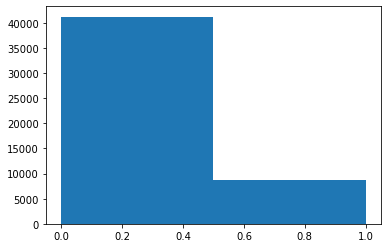

In [6]:
# 数据分布
plt.hist(x =train_data.click  ,bins=  2 ,   )

In [7]:
import seaborn as sns

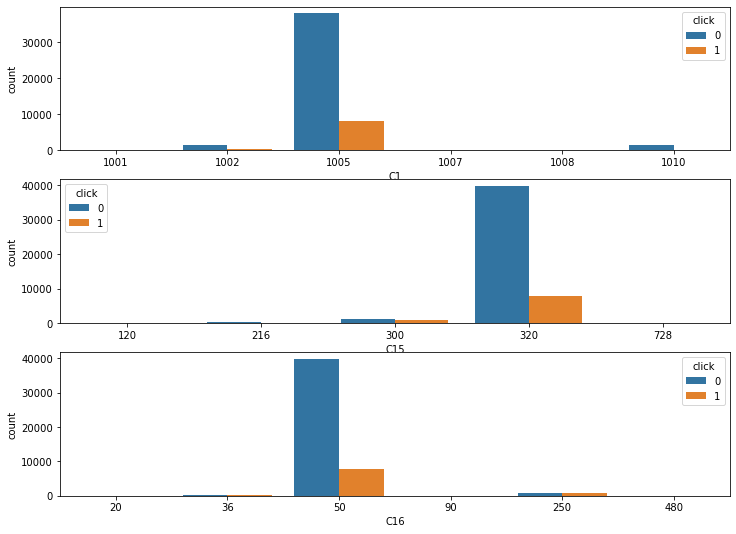

In [8]:

figure  =  plt.figure( figsize= (12, 9))
target = 'click'
features = ['C1' ,'C15' ,'C16']
for   i , feature in   enumerate(features ,start= 1 ):
    plt.subplot( 3,1 ,  i  )
    sns.countplot( x =   feature ,   data = train_data ,  hue =target   )

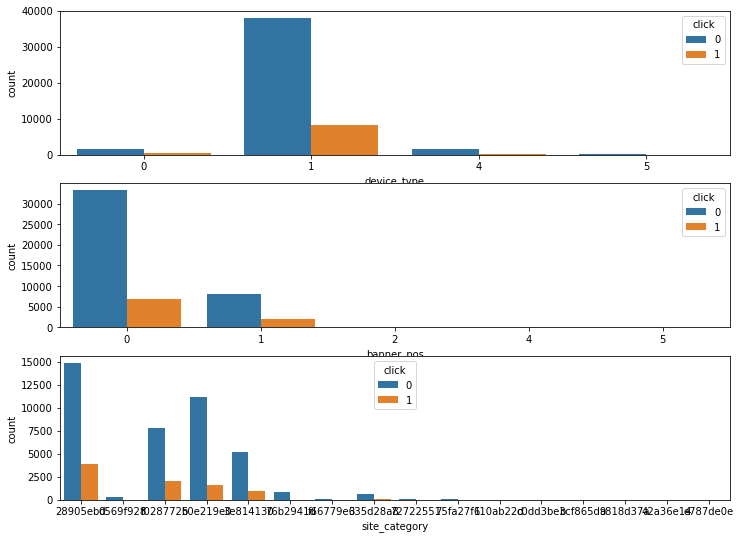

In [9]:
figure  =  plt.figure( figsize= (12, 9))
target = 'click'
features = ['device_type' ,'banner_pos' ,'site_category']
for   i , feature in   enumerate(features ,start= 1 ):
    plt.subplot( 3,1 ,  i  )
    sns.countplot( x =   feature ,   data = train_data ,  hue =target   )

In [45]:
martrix  = train_data.loc[:,  list(train_data.dtypes != 'object')].corr()
martrix  

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
id,1.000000,-0.001701,-0.003930,0.000389,-0.002264,0.001998,0.001904,-0.001582,0.000376,0.001122,-0.001748,0.002516,-0.001147,0.003115
click,-0.001701,1.000000,-0.054388,0.028288,-0.052708,-0.024748,-0.082810,-0.052828,0.138517,-0.075489,0.043664,0.069612,-0.008661,-0.158389
C1,-0.003930,-0.054388,1.000000,0.357805,0.966575,0.109387,0.110309,0.063053,-0.005859,0.118639,0.082551,-0.056181,-0.082579,0.104763
banner_pos,0.000389,0.028288,0.357805,1.000000,0.374950,0.042998,0.135413,-0.059158,-0.097910,0.131134,0.163135,0.318570,0.010721,-0.031318
device_type,-0.002264,-0.052708,0.966575,0.374950,1.000000,0.098730,0.145992,0.071670,-0.017405,0.159167,0.156535,-0.054492,-0.068708,0.106776
device_conn_type,0.001998,-0.024748,0.109387,0.042998,0.098730,1.000000,-0.026391,0.051296,-0.018282,-0.036325,0.012555,-0.010830,0.014150,0.067846
C14,0.001904,-0.082810,0.110309,0.135413,0.145992,-0.026391,1.000000,-0.077875,0.056455,0.978415,0.113882,0.077587,-0.023267,0.402345
C15,-0.001582,-0.052828,0.063053,-0.059158,0.071670,0.051296,-0.077875,1.000000,-0.257138,-0.091297,-0.020468,0.056613,0.016186,-0.033377
C16,0.000376,0.138517,-0.005859,-0.097910,-0.017405,-0.018282,0.056455,-0.257138,1.000000,0.073606,0.187977,-0.051752,-0.000950,-0.226184
C17,0.001122,-0.075489,0.118639,0.131134,0.159167,-0.036325,0.978415,-0.091297,0.073606,1.000000,0.146436,0.054239,-0.036700,0.377052


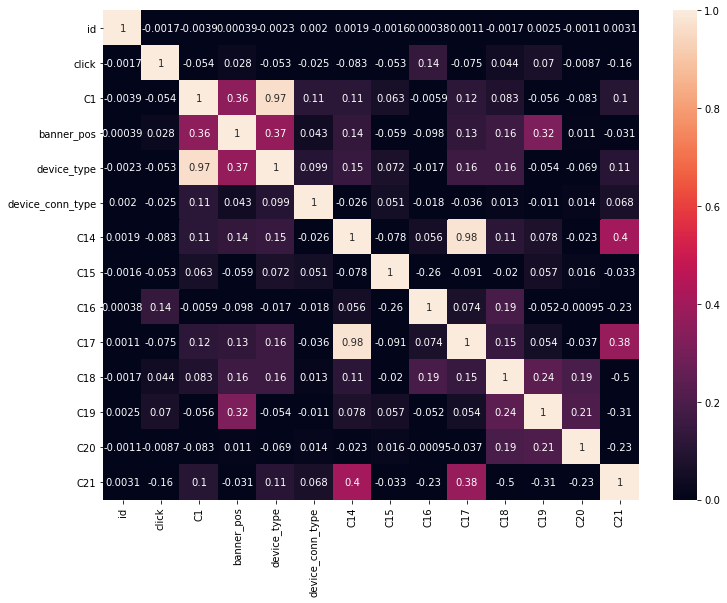

In [51]:
plt.figure(  figsize= (12, 9))
sns.heatmap(martrix  ,annot = True ,   vmin=0, vmax=1 )

####  device_id and  C1  x
#####  C14  and C17 
